In [18]:
"""
Imports
"""

import os
from dataclasses import dataclass

import lightning as L
import lightning.pytorch as pl
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from lightning.pytorch.callbacks import EarlyStopping, StochasticWeightAveraging, LearningRateMonitor, ModelCheckpoint, \
    TQDMProgressBar
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load Dataset

In [8]:
from train import MNISTDataModule

transform = T.Compose([
    T.Normalize([0.5], [0.5]),
])

dm = MNISTDataModule(
    train_transform=transform,
    test_transform=transform
)

In [9]:
dm.setup(stage='fit')

Total Dataset       : 42000 samples
Train Dataset       : 37000 samples
Validation Dataset  : 5000 samples


# Visualize Samples

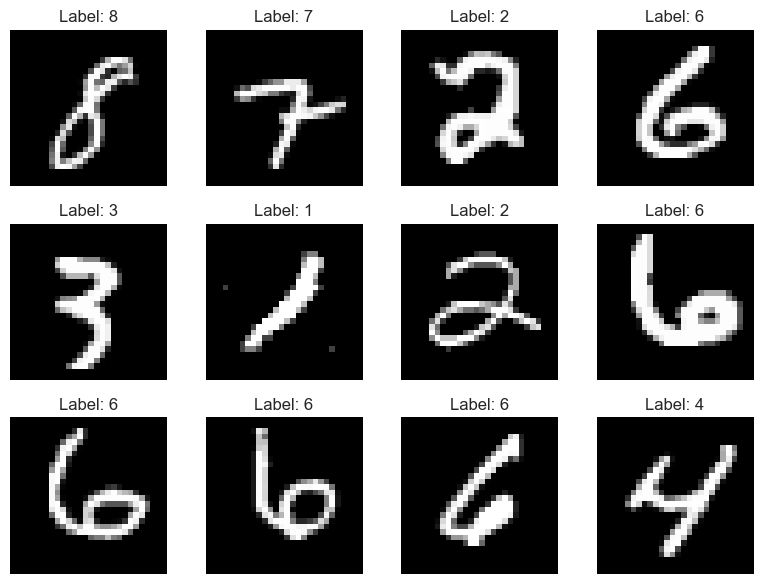

In [20]:
def visualize_samples_grid(dataset, n_samples=12, n_cols=4):
    n_rows = n_samples // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    
    for i, ax in enumerate(axes.flat):
        label, img = dataset[i]
        ax.imshow(img.squeeze(), cmap='gray')
        ax.set_title(f"Label: {label}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
visualize_samples_grid(dm.train_dataset, n_samples=12, n_cols=4)

# Digit Distribution

In [21]:
np.arange(11) - 0.5

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

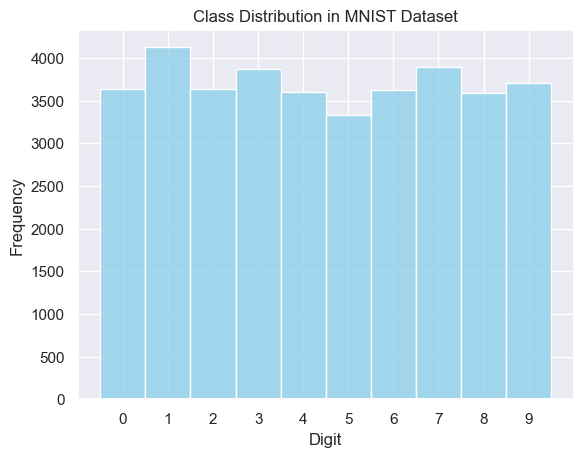

In [28]:
# Step 3: Check the Distribution of Classes (Digits)
def plot_class_distribution(dataset):
    labels = [label.item() for label, _ in dataset]
    
    sns.histplot(
        labels, 
        bins=np.arange(11) - 0.5, 
        kde=False, 
        color='skyblue'
    )
    
    plt.xticks(range(10))
    plt.xlabel('Digit')
    plt.ylabel('Frequency')
    plt.title('Class Distribution in MNIST Dataset')
    plt.show()

# Plot the class distribution in the training set
plot_class_distribution(dm.train_dataset)